<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/Continuous_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.8)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import lognorm, beta
from quantecon import LAE
from scipy.stats import norm, gaussian_kde

## Exercise 1

In [3]:
theta, n = 0.8, 500
theta_aux = (1-theta**2)**(1/2)

X = np.empty(n+1)
X[0] = np.random.randn()
shocks = np.random.randn(n)
for t in range(n):
  X[t+1] = theta*abs(X[t]) + theta_aux*shocks[t]

y_vals = np.linspace(-3, 3, 200)
psi_real = lambda y: 2*norm.pdf(y)*norm.cdf(theta*y/theta_aux)
p = lambda x,y: norm.pdf((y-theta*abs(x))/theta_aux)/theta_aux

psi_lae = LAE(p, X)

h = 1.06*np.std(X[1:])*n**(-1/5)
psi_kd = lambda x: np.sum(norm.pdf((x-X[1:])/h))/(n*h)

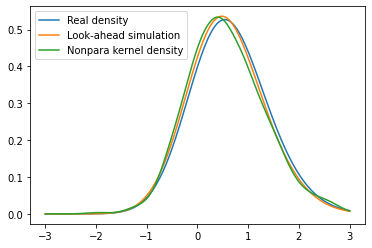

In [4]:
plt.plot(y_vals, psi_real(y_vals), label='Real density')
plt.plot(y_vals, psi_lae(y_vals), label='Look-ahead simulation')
plt.plot(y_vals, [psi_kd(y) for y in y_vals], label='Nonpara kernel density')
plt.legend();

## Exercise 2

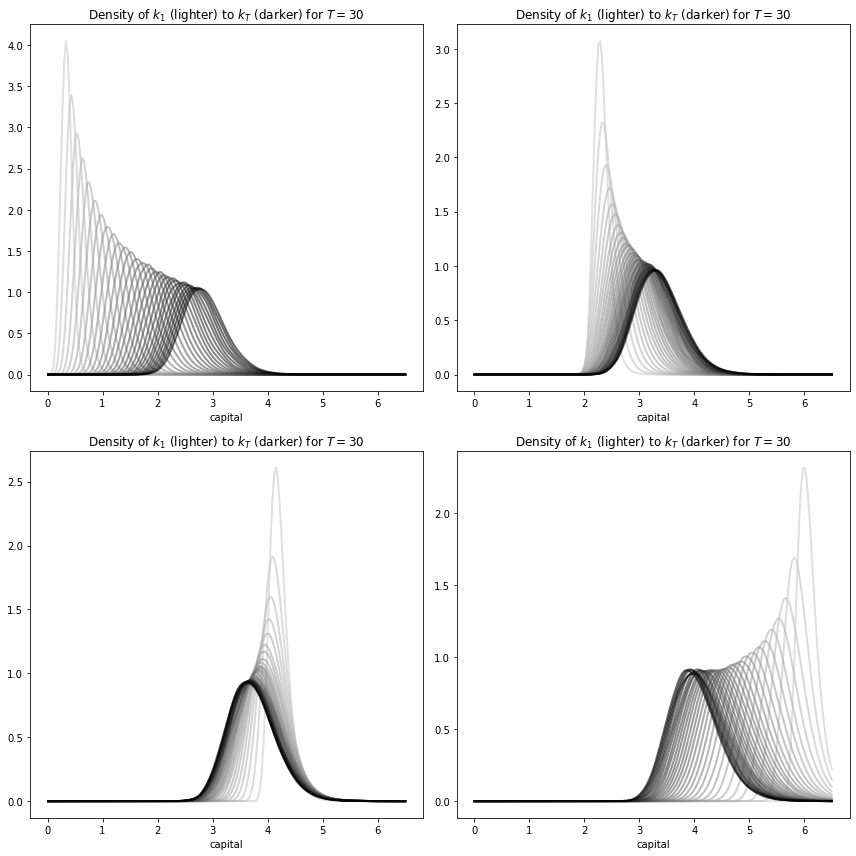

In [5]:
s = 0.2
delta = 0.1
a_sigma = 0.4                    # A = exp(B) where B ~ N(0, a_σ)
alpha = 0.4                      # We set f(k) = k**α
Psi = lognorm(a_sigma)


def p(x, y):
    """
    Stochastic kernel for the growth model with Cobb-Douglas production.
    Both x and y must be strictly positive.
    """
    d = s * x**alpha
    return Psi.pdf((y - (1 - delta) * x) / d) / d

n = 10000    # Number of observations at each date t
T = 30       # Compute density of k_t at 1,...,T+1
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for i in range(4):
  psi_0 = beta(5, 5, scale=0.5, loc=i*2)
  # == Generate matrix s.t. t-th column is n observations of k_t == #
  k = np.empty((n, T))
  A = Psi.rvs((n, T))
  k[:, 0] = psi_0.rvs(n)  # Draw first column from initial distribution
  for t in range(T-1):
      k[:, t+1] = s * A[:, t] * k[:, t]**alpha + (1 - delta) * k[:, t]

  # == Generate T instances of LAE using this data, one for each date t == #
  laes = [LAE(p, k[:, t]) for t in range(T)]

  # == Plot == #
  ygrid = np.linspace(0.01, 6.5, 200)
  greys = [str(g) for g in np.linspace(0.0, 0.8, T)]
  greys.reverse()
  for psi_, g in zip(laes, greys):
      axes[i].plot(ygrid, psi_(ygrid), color=g, lw=2, alpha=0.6)
  axes[i].set_xlabel('capital')
  axes[i].set_title(f'Density of $k_1$ (lighter) to $k_T$ (darker) for $T={T}$')
plt.tight_layout();

## Exercise 3

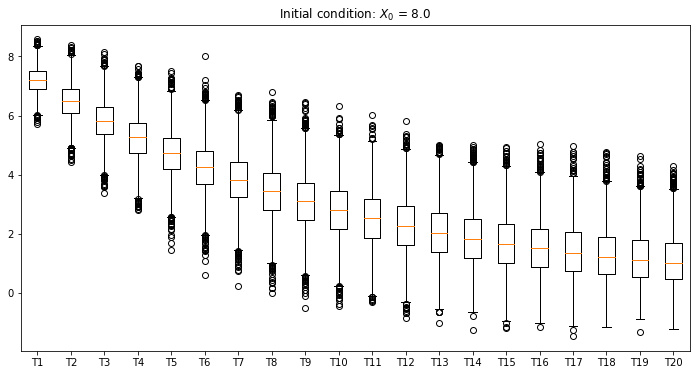

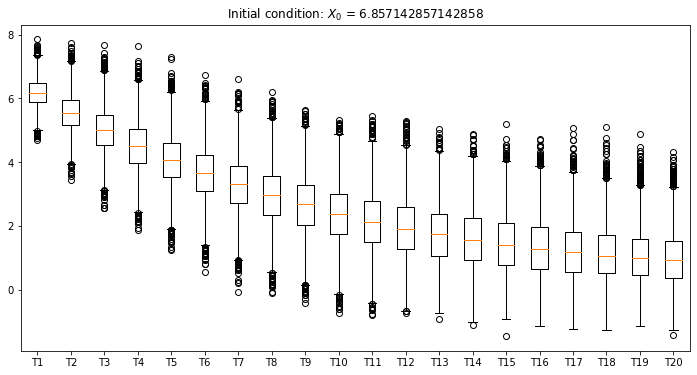

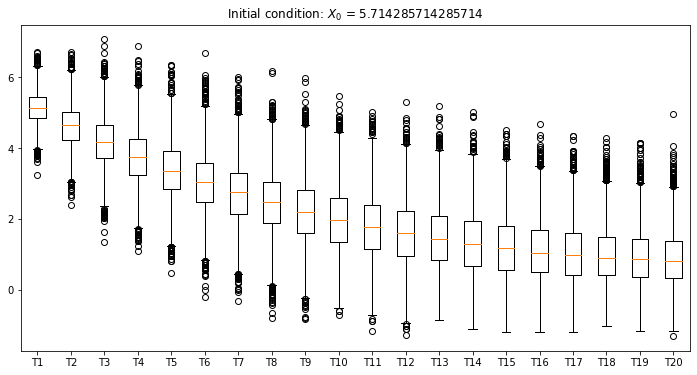

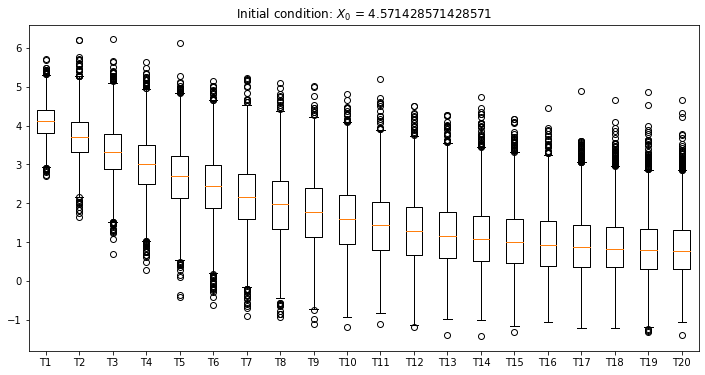

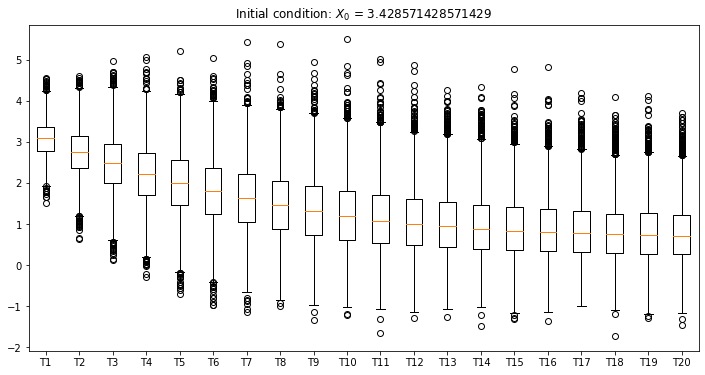

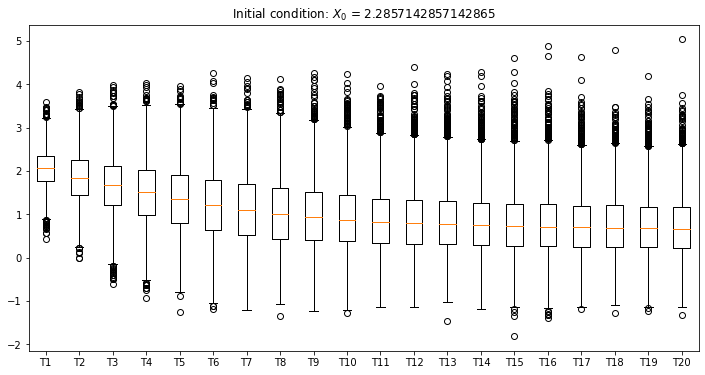

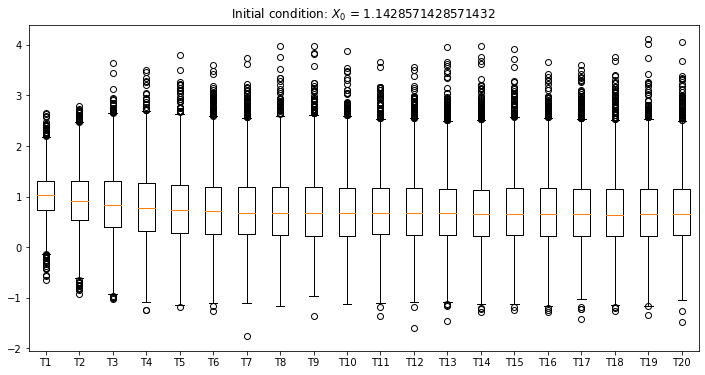

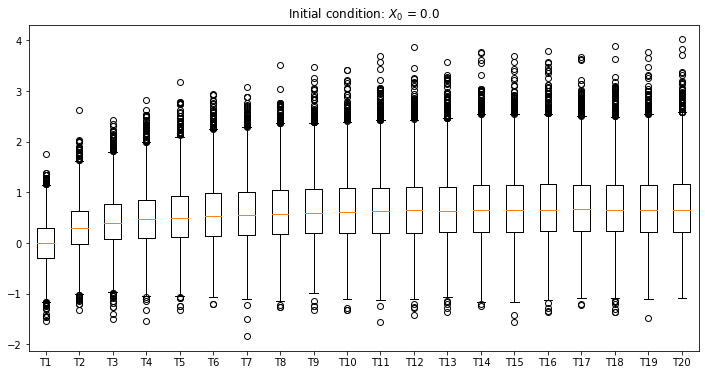

In [6]:
theta, n = 0.9, 20
k, J = 5000, 8
theta_aux = (1-theta**2)**(1/2)
initial_consitions = np.linspace(8, 0, J)

for X_0 in initial_consitions:
  X = np.empty((k, n+1))
  X[:,0] = X_0
  for i in range(k):
    for j in range(n):
      X[i, j+1] = theta*abs(X[i, j]) + theta_aux*np.random.randn()
  fig, ax = plt.subplots(1, 1, figsize=(12, 6))
  ax.boxplot([X[:, i] for i in range(1, n+1)])
  ax.set_xticks(range(1, n+1))
  ax.set_xticklabels((f'T{t}' for t in range(1, n+1)), fontsize=10)
  ax.set(title=fr'Initial condition: $X_0$ = {X_0}')